# Training the Model

In [1]:
import torch
from torchvision import transforms, datasets
import torch.nn as nn 
import torch.nn.functional as F

# init training and testing data
train = datasets.MNIST("", train =True, download=True, 
                       transform=transforms.Compose([transforms.ToTensor()]))

test = datasets.MNIST("", train =False, download=True, 
                       transform=transforms.Compose([transforms.ToTensor()]))

# Training and Testing sets
trainset = torch.utils.data.DataLoader(train, batch_size=10, shuffle=True) # Batch size dictates how much data is passed through model at a time
testset = torch.utils.data.DataLoader(test, batch_size=10, shuffle=True) # Shuffle creates randomness - improves generalization

In [2]:
class Net(nn.Module):
    def __init__(self):
        super().__init__() # Required
        self.fc1 = nn.Linear(28*28, 64) # Fully connected first layer, output -> 3 layers of 64 neurons
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 64)
        self.fc4 = nn.Linear(64, 10) # 10 outputs (1 for each number)
    
    def forward(self, x): # How data flows through network
        x = F.relu(self.fc1(x)) # Relu activation function
        x = F.relu(self.fc2(x))
        # Can put logic in here (more advanced)
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return F.log_softmax(x, dim=1)
    
net = Net()
print(net)

Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)


In [3]:
X = torch.rand((28,28))
X = X.view(-1,28*28) # Flattening

output = net(X)
output

tensor([[-2.2864, -2.2938, -2.4089, -2.3436, -2.1629, -2.3427, -2.1771, -2.3614,
         -2.3645, -2.3138]], grad_fn=<LogSoftmaxBackward>)

In [12]:
# Loss - How wrong is the model?
# Optimizer - Adjust weights based on losses (adjusts weights to lower loss slowly over time)

import torch.optim as optim

optimizer = optim.Adam(net.parameters(), lr=1e-3) # lr = learning rate (like a step size): too big makes it hard to find global minimum
# Might be good to have a decaying learning rate

# iterate over data to pass through model
# epoch = 1 pass through data

EPOCHS = 3

for epoch in range(EPOCHS):
    for data in trainset:
        # data is a batch of featuresets and labels
        X, y = data
        net.zero_grad()
        output = net(X.view(-1,28*28)) # get output
        # get loss
        loss = F.nll_loss(output, y)
        # backpropagate to train
        loss.backward()
        # Change weights
        optimizer.step()
    print(loss)

tensor(0.0190, grad_fn=<NllLossBackward>)
tensor(0.0208, grad_fn=<NllLossBackward>)
tensor(0.0006, grad_fn=<NllLossBackward>)


In [15]:
correct = 0
total = 0


# Evaluate on test set
with torch.no_grad():
    for data in testset:
        X, y = data
        output = net(X.view(-1,784))
        for idx, i in enumerate(output):
            if torch.argmax(i) == y[idx]:
                correct += 1
            total += 1
            
print('Accuracy: ', round(correct/total, 3))

Accuracy:  0.979


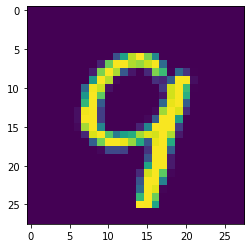

In [27]:
import matplotlib.pyplot as plt

plt.imshow(X[4].view(28,28))
plt.show()

In [26]:
print(torch.argmax(net(X[4].view(-1,784))[0]))

tensor(9)
